## Taylor Series examples

Created by: Dimitris Giovanis, 23/3/2019


The first-order reliability methods (FORM), as stated by its name, utilizes a first-order Taylor series expansions for the performance function in a standard normal probability space to derive probability of failure estimates. Consider a model in standard normal space  with performance function $g(\textbf{U})$. The FORM approximates
the performance function by:

$g(\textbf{U})  \approx L(\textbf{U}) = g(\textbf{u}^\star) + \nabla g(\textbf{u}^\star)(\textbf{U}-\textbf{u}^\star)^T$


where $\textbf{u}^\star$ is the point around which the series is expanded and its typically called the design point (needs to be found) and it corresponds to the point on the line  $g(\textbf{U})=0$ with the highest probability. $\nabla g(\textbf{u}^\star)$ is the gradient of $g(\textbf{U})$ evaluated at $\textbf{u}^\star$.

The benchmark problem is a simple structural reliability problem
defined in a two-dimensional parameter space consisting of a resistance $R$ and a stress $S$. The failure happens
when the stress is higher than the resistance, leading to the following limit-state function:

$ \textbf{X}=\{R, S\}$

$g(\textbf{X}) = R - S$

The two random variables are independent  and  distributed
according to:

$R \sim N(200, 20)$

$S \sim N(150, 10)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from UQpy.RunModel import RunModel
from UQpy.distributions import Normal
from UQpy.sampling import MonteCarloSampling
from UQpy.reliability import FORM, SORM
from UQpy.reliability import SORM
from UQpy.distributions import Lognormal, Gamma

In [2]:
RunModelObject = RunModel(model_script='pfn.py', model_object_name="example1", vec=False, ntasks=3)
dist1 = Normal(loc=200., scale=20.)
dist2 = Normal(loc=150, scale=10.)
Q = FORM(distributions=[dist1, dist2], runmodel_object=RunModelObject, tol1=1e-5, tol2=1e-5)
Q.run()

[ERROR] - 2021-12-05 09:36:45,741 - File: FORM.py - Method: run - Line: 297 - Error: [2.236067977499917, 2.236067977499917]
[ERROR] - 2021-12-05 09:36:46,894 - File: FORM.py - Method: run - Line: 297 - Error: [1.2710574864626038e-13, 1.270095140171179e-13]


In [3]:
# print results
print('Design point in standard normal space: %s' % Q.DesignPoint_U)
print('Design point in original space: %s' % Q.DesignPoint_X)
print('Hasofer-Lind reliability index: %s' % Q.beta_form)
print('FORM probability of failure: %s' % Q.failure_probability)
print(Q.dg_u_record)

Design point in standard normal space: [array([-2.,  1.])]
Design point in original space: [array([160., 160.])]
Hasofer-Lind reliability index: [2.236067977499917]
FORM probability of failure: [0.012673659338729965]
[array([[0., 0.]])]


/var/folders/t5/4jtc8k1902j5q91znr0l4z5r0000gn/T/ipykernel_3602/1091595619.py:45: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot([0, 200], [0, 200], 'k', Linewidth=5)
/var/folders/t5/4jtc8k1902j5q91znr0l4z5r0000gn/T/ipykernel_3602/1091595619.py:59: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal', 'box')


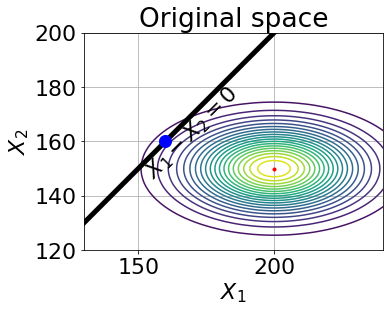

/var/folders/t5/4jtc8k1902j5q91znr0l4z5r0000gn/T/ipykernel_3602/1091595619.py:66: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot([0, Q.DesignPoint_U[0][0]], [0, Q.DesignPoint_U[0][1]], 'b', Linewidth=2)
/var/folders/t5/4jtc8k1902j5q91znr0l4z5r0000gn/T/ipykernel_3602/1091595619.py:67: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot([0, -3], [5, -1], 'k', Linewidth=5)
/var/folders/t5/4jtc8k1902j5q91znr0l4z5r0000gn/T/ipykernel_3602/1091595619.py:99: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('e

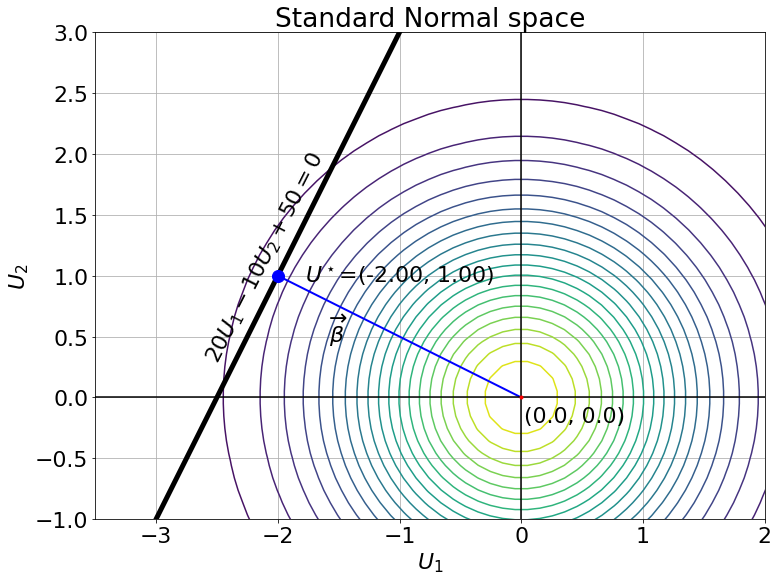

In [4]:
# Supporting function
def multivariate_gaussian(pos, mu, Sigma):
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2 * np.pi) ** n * Sigma_det)
    fac = np.einsum('...k,kl,...l->...', pos - mu, Sigma_inv, pos - mu)
    return np.exp(-fac / 2) / N

N = 60
XX = np.linspace(150, 250, N)
YX = np.linspace(120, 180, N)
XX, YX = np.meshgrid(XX, YX)

XU = np.linspace(-3, 3, N)
YU = np.linspace(-3, 3, N)
XU, YU = np.meshgrid(XU, YU)

# Mean vector and covariance matrix in the original space
parameters = [[200, 20], [150, 10]]
mu_X = np.array([parameters[0][0], parameters[1][0]])
Sigma_X = np.array([[parameters[0][1] ** 2, 0.0], [0.0, parameters[1][1] ** 2]])

# Mean vector and covariance matrix in the standard normal space
mu_U = np.array([0., 0.])
Sigma_U = np.array([[1., 0.0], [0.0, 1]])

# Pack X and Y into a single 3-dimensional array for the original space
posX = np.empty(XX.shape + (2,))
posX[:, :, 0] = XX
posX[:, :, 1] = YX
ZX = multivariate_gaussian(posX, mu_X, Sigma_X)

# Pack X and Y into a single 3-dimensional array for the standard normal space
posU = np.empty(XU.shape + (2,))
posU[:, :, 0] = XU
posU[:, :, 1] = YU
ZU = multivariate_gaussian(posU, mu_U, Sigma_U)

# Figure 4a
plt.figure()
plt.rcParams["figure.figsize"] = (12, 12)
plt.rcParams.update({'font.size': 22})
plt.plot(parameters[0][0], parameters[1][0], 'r.')
plt.plot([0, 200], [0, 200], 'k', Linewidth=5)
plt.plot(Q.DesignPoint_X[0][0], Q.DesignPoint_X[0][1], 'bo', markersize=12)
plt.contour(XX, YX, ZX, levels=20)
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.text(170, 182, '$X_1 - X_2=0$',
         rotation=45,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')
plt.ylim([120, 200])
plt.xlim([130, 240])
plt.grid()
plt.title('Original space')
plt.axes().set_aspect('equal', 'box')
plt.show()

# Figure 4b
plt.figure()
plt.rcParams["figure.figsize"] = (12, 12)
plt.rcParams.update({'font.size': 22})
plt.plot([0, Q.DesignPoint_U[0][0]], [0, Q.DesignPoint_U[0][1]], 'b', Linewidth=2)
plt.plot([0, -3], [5, -1], 'k', Linewidth=5)
plt.plot(Q.DesignPoint_U[0][0], Q.DesignPoint_U[0][1], 'bo', markersize=12)
plt.contour(XU, YU, ZU, levels=20)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(0, 0, 'r.')

plt.xlabel(r'$U_1$')
plt.ylabel(r'$U_2$')
plt.text(-1.0, 1.1, '$U^\star$=({:1.2f}, {:1.2f})'.format(-2.0, 1.0),
         rotation=0,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')

plt.text(-2.1, 2.05, '$20U_1 - 10U_2 + 50=0$',
         rotation=63,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')

plt.text(-1.5, 0.7, r'$\overrightarrow{\beta}$',
         rotation=0,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')

plt.text(0.02, -0.2, '({:1.1f}, {:1.1f})'.format(0.0, 0.0))
plt.ylim([-1, 3])
plt.xlim([-3.5, 2])
plt.grid()
plt.title('Standard Normal space')
plt.axes().set_aspect('equal', 'box')
plt.show()

## Example #2

In the second example we have the limit state to be a linear function of two ($d$=2) independent Gaussian random variables

$g(\textbf{U}) = -\frac{1}{\sqrt{d}}\sum_{i=1}^{d} u_i + \beta$


The probability of failure in this case is $P(F) ≈ 10^{−3}$ for $\beta$ = 3.0902

In [5]:
dist1 = Normal(loc=0., scale=1.)
dist2 = Normal(loc=0., scale=1.)
RunModelObject2 = RunModel(model_script='pfn.py', model_object_name="example2", vec=False, ntasks=3)
Z = FORM(distributions=[dist1, dist2], runmodel_object=RunModelObject2)
Z.run()

[ERROR] - 2021-12-05 09:36:48,646 - File: FORM.py - Method: run - Line: 297 - Error: [3.0902000000000838, 3.0902000000000838, 0.9999999999999729]
[ERROR] - 2021-12-05 09:36:49,812 - File: FORM.py - Method: run - Line: 297 - Error: [8.352891880197684e-14, 8.482103908136196e-14, 1.25607396694702e-13]


In [6]:
# print results
print('Design point in standard normal space: %s' % Z.DesignPoint_U)
print('Design point in original space: %s' % Z.DesignPoint_X)
print('Hasofer-Lind reliability index: %s' % Z.beta_form)
print('FORM probability of failure: %s' % Z.failure_probability)

Design point in standard normal space: [array([2.18510138, 2.18510138])]
Design point in original space: [array([2.18510138, 2.18510138])]
Hasofer-Lind reliability index: [3.0902000000000847]
FORM probability of failure: [0.0010001087832067846]


/var/folders/t5/4jtc8k1902j5q91znr0l4z5r0000gn/T/ipykernel_3602/3271908284.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot([0, Z.DesignPoint_U[0][0]], [0, Z.DesignPoint_U[0][1]], Linewidth=2)
/var/folders/t5/4jtc8k1902j5q91znr0l4z5r0000gn/T/ipykernel_3602/3271908284.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal', 'box')


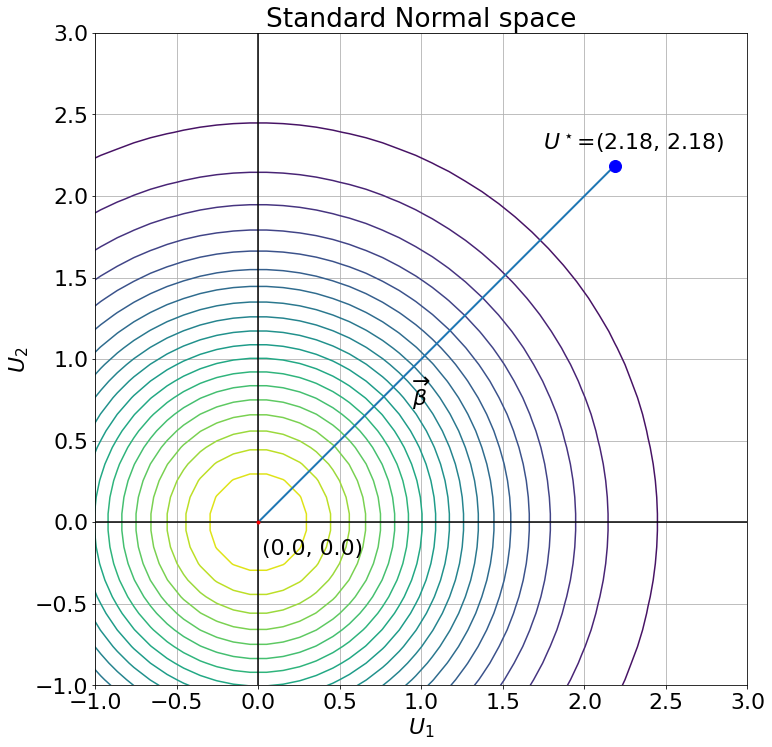

In [7]:
plt.figure()
plt.rcParams["figure.figsize"] = (12, 12)
plt.rcParams.update({'font.size': 22})
plt.plot([0, Z.DesignPoint_U[0][0]], [0, Z.DesignPoint_U[0][1]], Linewidth=2)
plt.plot(Z.DesignPoint_U[0][0], Z.DesignPoint_U[0][1], 'bo', markersize=12)
plt.contour(XU, YU, ZU, levels=20)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(0, 0, 'r.')

plt.xlabel(r'$U_1$')
plt.ylabel(r'$U_2$')
plt.text(2.3, 2.4, '$U^\star$=({:1.2f}, {:1.2f})'.format(2.18, 2.18),
         rotation=0,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')

plt.text(1.0, 0.9, r'$\overrightarrow{\beta}$',
         rotation=0,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')

plt.text(0.02, -0.2, '({:1.1f}, {:1.1f})'.format(0.0, 0.0))
plt.ylim([-1, 3])
plt.xlim([-1, 3])
plt.grid()
plt.title('Standard Normal space')
plt.axes().set_aspect('equal', 'box')
plt.show()

## Example 3

In the third example we have the limit state to be a linear function of three ($d$=3) independent Gaussian random variables

$g(X_1, X_2, X_3) = 6.2X_1 -X_2X_3^2$

$\mu_{X_1}=20, \mu_{X_2}=5, \mu_{X_3}=4$

$\sigma_{X_1}=3.5, \sigma_{X_2}=0.8, \sigma_{X_3}=0.4$

The probability of failure in this case is $P_f ≈ 0.079$ for $\beta$ = 1.413

In [8]:
dist1 = Normal(loc=20., scale=3.5)
dist2 = Normal(loc=5., scale=0.8)
dist3 = Normal(loc=4., scale=0.4)
RunModelObject3 = RunModel(model_script='pfn.py', model_object_name="example3", vec=False, ntasks=3)
Z0 = FORM(distributions=[dist1, dist2, dist3], runmodel_object=RunModelObject3)
Z0.run()

[ERROR] - 2021-12-05 09:36:51,296 - File: FORM.py - Method: run - Line: 297 - Error: [1.4742788548892407, 1.474278854889241, 29.845100100350834]
[ERROR] - 2021-12-05 09:36:52,467 - File: FORM.py - Method: run - Line: 297 - Error: [0.1339090104220222, 0.05634497876065736, 3.673010514492498]
[ERROR] - 2021-12-05 09:36:53,631 - File: FORM.py - Method: run - Line: 297 - Error: [0.004361840382063677, 8.737097081401579e-05, 0.14984214096655377]


In [9]:
print('Design point in standard normal space: %s' % Z0.DesignPoint_U)
print('Design point in original space: %s' % Z0.DesignPoint_X)
print('Hasofer-Lind reliability index: %s' % Z0.beta_form)
print('FORM probability of failure: %s' % Z0.failure_probability)

Design point in standard normal space: [array([-0.94421323,  0.64847379,  0.82721683])]
Design point in original space: [array([16.69525368,  5.51877903,  4.33088673])]
Hasofer-Lind reliability index: [1.4129138476908125]
FORM probability of failure: [0.07884052847290163]


## Example 4

In the fourth example we have the limit state to be a nonlinear function of two ($d$=2) random variables

$g(X_1, X_2) = X_1X_1 - 80$

where $X_1$ follows a normal distribution with mean $\mu_{X_1}=20$ and standard deviation $\sigma_{X_1}=7$ and $X_2$ follows a lognormal distribution with mean $\mu_{X_2}=7$ and standard deviation $\sigma_{X_2}=1.4$.

In [10]:
m0 = 7
v0 = 1.4
mu = np.log(m0) - np.log(np.sqrt(1 + (v0 / m0) ** 2))
scale = np.exp(mu)
s = np.sqrt(np.log(1 + (v0 / m0) ** 2))
loc_ = 0.0

dist1 = Normal(loc=20., scale=2)
dist2 = Lognormal(s=s, loc=0.0, scale=scale)
RunModelObject4 = RunModel(model_script='pfn.py', model_object_name="example4", vec=False, ntasks=3)
form = FORM(distributions=[dist1, dist2], runmodel_object=RunModelObject4)
form.run()
Q0 = SORM(form_object=form)

[ERROR] - 2021-12-05 09:36:54,807 - File: FORM.py - Method: run - Line: 297 - Error: [1.8807335919335486, 1.8807335919335486, 30.456889185373097]
[ERROR] - 2021-12-05 09:36:55,955 - File: FORM.py - Method: run - Line: 297 - Error: [0.5005337135839063, 0.49578968495934816, 10.1178689294992]
[ERROR] - 2021-12-05 09:36:57,148 - File: FORM.py - Method: run - Line: 297 - Error: [0.0434286173151012, 0.027340904955277967, 2.044757979857176]
[ERROR] - 2021-12-05 09:36:58,334 - File: FORM.py - Method: run - Line: 297 - Error: [0.005023641054464652, 3.39726992137912e-05, 0.10006053435849972]


In [11]:
# print results
print('Design point: %s' % Q0.DesignPoint_X)
print('Design point: %s' % Q0.DesignPoint_U)
print('beta: %s' % Q0.beta_form)
print('FORM probability of failure: %s' % Q0.Pf_form)
print('SORM probability of failure: %s' % Q0.failure_probability)

Design point: [17.61945158  4.54047165]
Design point: [-1.19027421 -2.0867719 ]
beta: 2.4023622553077018
FORM probability of failure: [0.00814478405303774]
SORM probability of failure: [0.008360172732226159]
